<a href="https://colab.research.google.com/github/alwaysalearner1234/ML03/blob/main/Naive_Bayes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [ ]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})


In [7]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [8]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)


,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female

In [9]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [10]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [11]:
inputs.Age[:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [12]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True
3,1,35.0,53.1000,True
4,3,35.0,8.0500,False


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)


In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [15]:
model.fit(X_train,y_train)


GaussianNB()

In [16]:
model.score(X_test,y_test)

0.7835820895522388

In [17]:
X_test[0:10]


,Pclass,Age,Fare,female
7,3,2.000000,21.0750,False
469,3,0.750000,19.2583,True
307,1,17.000000,108.9000,True
168,1,29.699118,25.9250,False
524,3,29.699118,7.2292,False
484,1,25.000000,91.0792,False
815,1,29.699118,0.0000,False
435,1,14.000000,120.0000,True
462,1,47.000000,38.5000,False
388,3,29.699118,7.7292,False


In [18]:
y_test[0:10]


,Survived
7,0
469,1
307,1
168,0
524,0
484,1
815,0
435,1
462,0
388,0


In [19]:
model.predict(X_test[0:10])


array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [20]:
model.predict(X_test[0:10])


array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

Calculate the score using cross validation



In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.784     , 0.808     , 0.768     , 0.73387097, 0.76612903])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data with noise
X = np.arange(10).reshape(-1,1)
y = 2*X.flatten() + 3 + np.random.randn(10)*1.5  # added random noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5.208890876313153


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample dataset
X = np.arange(10).reshape(-1,1)
y = 2*X.flatten() + 3 + np.random.randn(10)*0.5  # adding slight noise

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate error
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))


Training MSE: 0.07381895621079858
Testing MSE: 0.5317259398395242


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data
X = np.arange(20).reshape(-1,1)
y = 3*X.flatten() + 5 + np.random.randn(20)*2  # added noise

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Check generalization
print("Training MSE:", mean_squared_error(y_train, train_pred))
print("Testing MSE:", mean_squared_error(y_test, test_pred))


Training MSE: 1.559505109163807
Testing MSE: 13.141414661356968


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data
X = np.linspace(0, 5, 50).reshape(-1,1)
y = np.sin(X).ravel() + np.random.randn(50)*0.1  # added noise

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model: Polynomial regression of degree 10 (high variance)
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Errors
train_error = mean_squared_error(y_train, model.predict(X_train_poly))
test_error = mean_squared_error(y_test, model.predict(X_test_poly))

print("Training Error:", train_error)
print("Testing Error:", test_error)


Training Error: 0.0020890796516629803
Testing Error: 0.010245478082858502


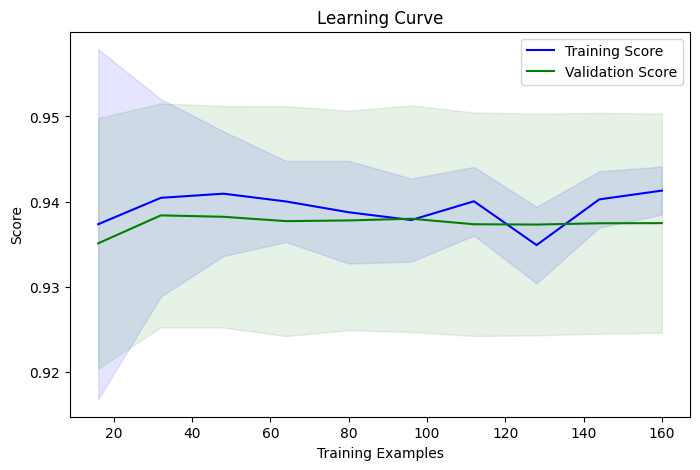

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np

# Sample data
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Model
model = LinearRegression()

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,10))

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


Mean Squared Error: 0.44322656275528605
Intercept: 1.2029702970297018
Coefficient: [0.88366337]


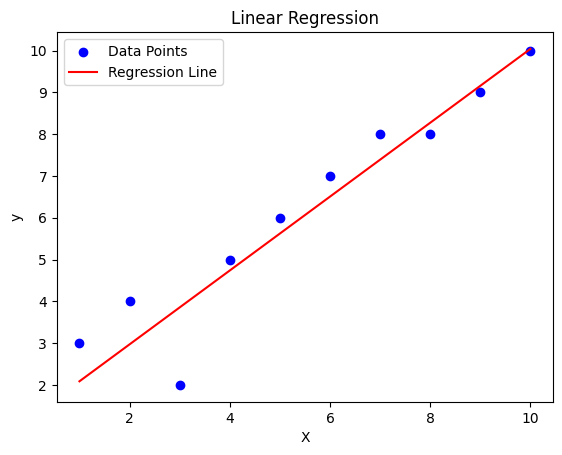

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([3,4,2,5,6,7,8,8,9,10])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


Mean Squared Error: 3.31321580192825e-30
Intercept: 1.4999999999999973
Coefficients: [0.5 0.5]


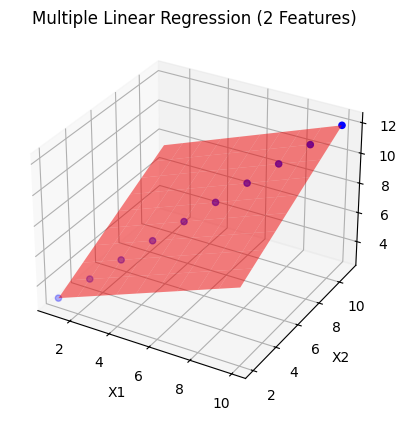

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

# Sample data: 2 features
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6],
              [6, 7],
              [7, 8],
              [8, 9],
              [9, 10],
              [10, 11]])

y = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Train Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y, color='blue', label='Data Points')

# Create a grid to plot regression plane
x_surf, y_surf = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 10),
                             np.linspace(X[:,1].min(), X[:,1].max(), 10))
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Multiple Linear Regression (2 Features)')
plt.show()


In [29]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample data
# X = [hours studied, hours slept], y = 1(pass)/0(fail)
X = np.array([[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10]])
y = np.array([0,0,0,1,1,1,1,1])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Predicted probabilities:", y_prob)
print("Predicted classes:", y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Predicted probabilities: [0.18488365 0.96194467 0.0652542 ]
Predicted classes: [0 1 0]
Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]


Fitted parameters: [1.50640515 0.39030237]


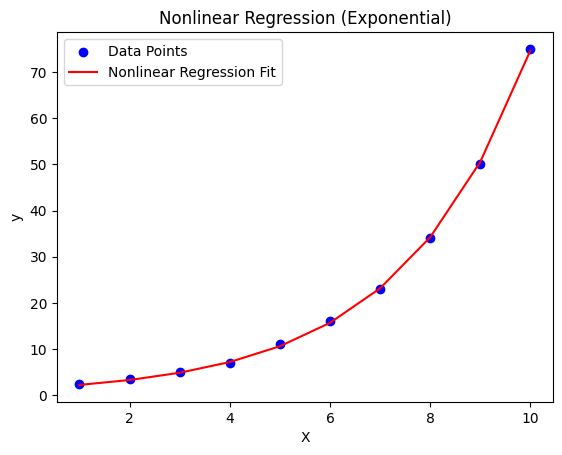

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data (nonlinear)
X = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2.5, 3.5, 5, 7, 11, 16, 23, 34, 50, 75])

# Define nonlinear model function (exponential)
def model_func(x, a, b):
    return a * np.exp(b * x)

# Fit the model
params, covariance = curve_fit(model_func, X, y)

# Predicted values
y_pred = model_func(X, *params)

# Print parameters
print("Fitted parameters:", params)

# Plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Nonlinear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression (Exponential)')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = [3, 5, 7, 9]
y_pred = [2.5, 5.1, 6.8, 9.2]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_true, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.24999999999999978
MSE: 0.08499999999999994
RMSE: 0.29154759474226494
R2 Score: 0.983


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = [0,1,0,1,0,1,1]
y_pred = [0,1,0,0,0,1,1]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[3 0]
 [1 3]]


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np # Import numpy

model = LinearRegression()
# Reshape X to be a 2D array
X_reshaped = X.reshape(-1, 1)
scores = cross_val_score(model, X_reshaped, y, cv=5, scoring='r2')  # For regression
print("Cross-Validation R2 Scores:", scores)
print("Mean R2:", scores.mean())

Cross-Validation R2 Scores: [-1979.83021542   -16.74076485   -20.34322576    -3.82625258
    -4.93240113]
Mean R2: -405.1345719495611


In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

texts = ["Free offer now", "Win money", "Meeting schedule", "Project update"]
labels = [1, 1, 0, 0]  # 1 = Spam, 0 = Not Spam

# Convert text to bag-of-words
cv = CountVectorizer()
X = cv.fit_transform(texts)

# Train model
model = MultinomialNB()
model.fit(X, labels)

# Predict new text
new_text = cv.transform(["Free money offer"])
print(model.predict(new_text))  # Output: [1] => Spam


[1]


In [38]:
def is_connected(graph):
    visited = set()
    start = list(graph.keys())[0]

    def dfs(v):
        visited.add(v)
        for neighbor in graph[v]:
            if neighbor not in visited:
                dfs(neighbor)

    dfs(start)
    return len(visited) == len(graph)
